In [2]:
%pip install hic-straw

  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for hic-straw: filename=hic_straw-1.3.1-cp310-cp310-linux_x86_64.whl size=1610066 sha256=70c53ca829111f21c3ac1b9bfff4bea8f8980ae8fcdcd2ad52020f3eb6af0867
  Stored in directory: /root/.cache/pip/wheels/23/85/e0/14f1be833ddf1da34165e04938653e00b602eb93e834497ae4
Successfully built hic-straw


In [4]:
import numpy as npb
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import hicstraw

In [7]:
hic = hicstraw.HiCFile("https://www.encodeproject.org/files/ENCFF718AWL/@@download/ENCFF718AWL.hic")

In [8]:
matrix_object_chr4 = hic.getMatrixZoomData('6', '6', "observed", "KR", "BP", 5000)

In [11]:
numpy_matrix_chr4 = matrix_object_chr4.getRecordsAsMatrix(10000000, 12000000, 10000000, 12000000)

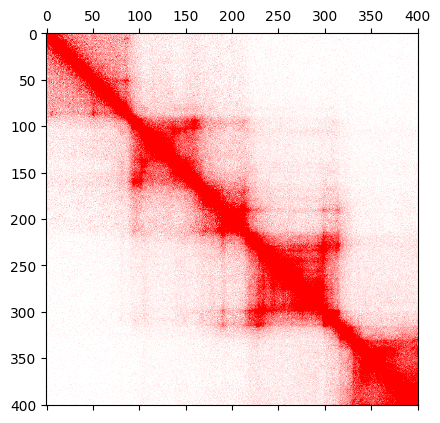

In [12]:
REDMAP = LinearSegmentedColormap.from_list("bright_red", [(1,1,1),(1,0,0)])

def plot_hic_map(dense_matrix, maxcolor):
    plt.matshow(dense_matrix, cmap=REDMAP, vmin=0, vmax=maxcolor)
    plt.show()

plot_hic_map(numpy_matrix_chr4, 30)